In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from io import StringIO

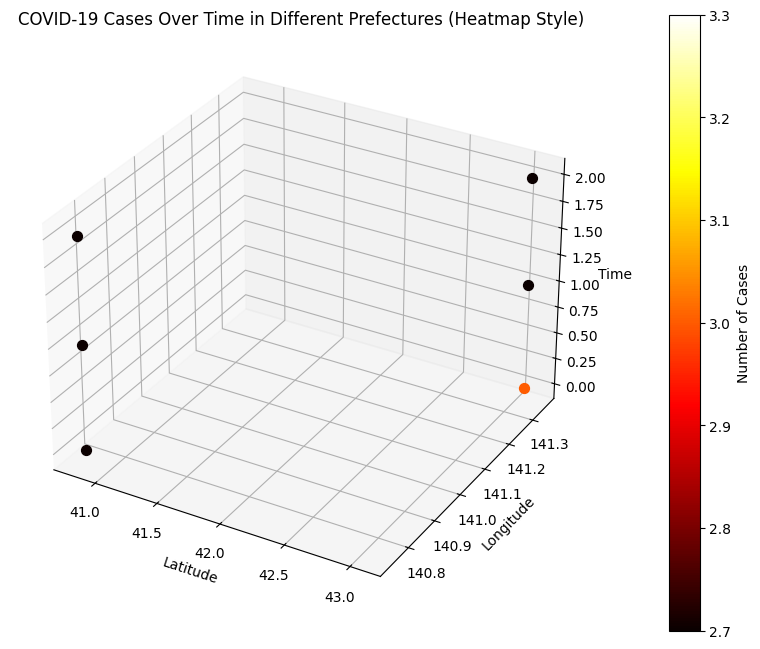

In [28]:
import pandas as pd
import io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

# サンプルデータ
corona_data = """
pref_name,2020-1-16,2020-1-17,2020-1-18
Hokkaido,3,4,300
Aomori,231,333,5000
"""

# 県ごとの緯度経度データ
latlong_data = """
pref_name,lat,lon
Hokkaido,43.064359,141.347449
Aomori,40.824294,140.740054
"""

# データをDataFrameに読み込む
corona_df = pd.read_csv(io.StringIO(corona_data), index_col='pref_name')
latlong_df = pd.read_csv(io.StringIO(latlong_data), index_col='pref_name')

# 3Dプロット
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# データのプロット
for pref_name, row in corona_df.iterrows():
    lat = latlong_df.loc[pref_name, 'lat']
    lon = latlong_df.loc[pref_name, 'lon']
    time_points = pd.to_datetime(row.index, format='%Y-%m-%d')
    cases = row.values.astype(int)
    
    # Z軸に時間、X軸に緯度、Y軸に経度をとってヒートマップ風のプロット
    for i in range(len(time_points)):
        ax.scatter(lat, lon, i, c=cases[i], cmap=cm.hot, s=50)

# グラフの設定
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Time')
ax.set_title('COVID-19 Cases Over Time in Different Prefectures (Heatmap Style)')

# カラーバーの追加
cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.1)
cbar.set_label('Number of Cases')

plt.show()
